<a href="https://colab.research.google.com/github/agarwalarpit99/chest-xray-pneumonia/blob/master/Chest_xray_importing_data_from_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arpitkumaragarwal","key":"f53e388348af4c75f8d2d0e42bac13cf"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 87.3MB/s]
 82% 5.00M/6.09M [00:00<00:00, 42.1MB/s]
100% 6.09M/6.09M [00:00<00:00, 39.0MB/s]
 55% 5.00M/9.16M [00:00<00:00, 29.9MB/s]
100% 9.16M/9.16M [00:00<00:00, 44.8MB/s]


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:32<00:00, 49.0MB/s]
100% 2.29G/2.29G [00:32<00:00, 76.0MB/s]


In [6]:
from zipfile import ZipFile
file_name='chest-xray-pneumonia.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [0]:
#for creating the path of images of both pneumonia and normal images
path_train='/content/chest_xray/chest_xray/train'
path_test='/content/chest_xray/chest_xray/test'
path_val='/content/chest_xray/chest_xray/val'

In [0]:
img=glob(path_train+"/PNEUMONIA/*.jpeg") #Getting all pnenmonia images in this folder

In [0]:
#Converting first image above into a numpy array
img1=np.asarray(plt.imread(img[0]))

In [14]:
img1.shape

(672, 1088)

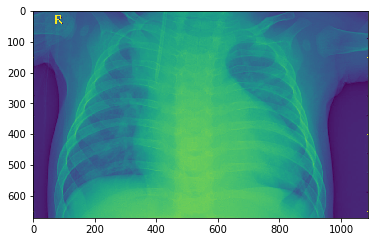

In [15]:
plt.imshow(img1)

In [0]:
#Same be done for showing normal images
img_normal=glob(path_train+'/NORMAL/*.jpeg')

In [0]:
img_n1=np.asarray(plt.imread(img_normal[0]))

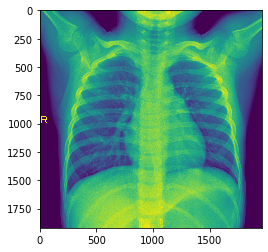

In [19]:
plt.imshow(img_n1)

In [20]:
img_n1.shape
#Both the images is of different sizes


(1920, 1960)

In [22]:
print(len(img))
print(len(img_normal))
#so we have 3875 images of pnumonia and 1341 images of normal to train on

3875
1341


In [0]:
#Data Augmentation for creating more images for training purpose
#Data preprocessing and analysis
from keras_preprocessing.image import ImageDataGenerator
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(path_train+"/NORMAL/*.jpeg")
train_data += glob(path_train+"/PNEUMONIA/*.jpeg")
train_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip=True)
val_gen=ImageDataGenerator(rescale=1./255) #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.

In [25]:
len(train_data)

5216

In [74]:
#For creating batches(directiory) of train,test and val data and converting images to the equal sizes
train_batches = train_gen.flow_from_directory(path_train, target_size = (226, 226),
                classes = classes, class_mode = "categorical")
val_batches = val_gen.flow_from_directory(path_val, target_size = (226, 226), 
                classes = classes, class_mode = "categorical")
test_batches = val_gen.flow_from_directory(path_test, target_size = (226, 226), 
                    classes = classes, class_mode = "categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [28]:
train_batches.image_shape

(226, 226, 3)

In [32]:
train_batches.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [37]:
train_batches.data_format

'channels_last'

In [41]:
train_batches

In [0]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

In [0]:
model=Sequential()
model.add(Conv2D(192,kernel_size=3,input_shape=(226,226,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(324,kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(388,kernel_size=3))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(train_batches,validation_data=val_batches,epochs=20)

In [55]:
'''from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
#VGG16 Model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))'''


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
optimizer = Adam(lr = 0.0001)
early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_acc", mode="max", verbose = 2)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit_generator(epochs=5, callbacks=[early_stopping_monitor], shuffle=True,
                              validation_data=val_batches, generator=train_batches, 
                              steps_per_epoch=500, validation_steps=10,verbose=2)
#prediction = model.predict_generator(generator=train_batches, verbose=2, steps=100)

Epoch 1/5
 - 317s - loss: 0.3050 - acc: 0.8731 - val_loss: 0.3636 - val_acc: 0.9375
Epoch 2/5
 - 315s - loss: 0.1795 - acc: 0.9283 - val_loss: 1.5044 - val_acc: 0.6250
Epoch 3/5
 - 316s - loss: 0.1676 - acc: 0.9356 - val_loss: 0.3353 - val_acc: 0.8750
Epoch 4/5
 - 312s - loss: 0.1311 - acc: 0.9496 - val_loss: 1.5199 - val_acc: 0.6250
Epoch 00004: early stopping


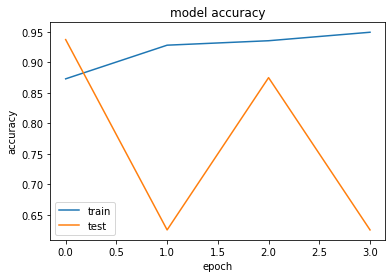

In [59]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

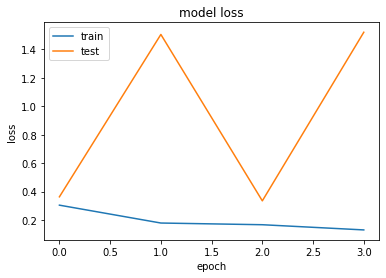

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [62]:
test_loss, test_score = model.evaluate_generator(test_batches,steps=100)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

Loss on test set:  0.6251263685715505
Accuracy on test set:  0.8205128205128205


In [67]:
p = model.predict_generator(test_batches, verbose=True)
pre = pd.DataFrame(p)
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)

20/20 [==============================] - 6s 280ms/step


In [72]:
pre.head(10)

,0,1,filename,label,pre
0,4.869347e-06,0.999995,NORMAL/IM-0001-0001.jpeg,0,1
1,8.111291e-01,0.188871,NORMAL/IM-0003-0001.jpeg,0,0
2,3.468403e-01,0.653160,NORMAL/IM-0005-0001.jpeg,0,1
3,4.199156e-06,0.999996,NORMAL/IM-0006-0001.jpeg,0,1
4,6.713762e-01,0.328624,NORMAL/IM-0007-0001.jpeg,0,0
5,4.489236e-05,0.999955,NORMAL/IM-0009-0001.jpeg,0,1
6,4.982882e-05,0.999950,NORMAL/IM-0010-0001.jpeg,0,1
7,1.340339e-01,0.865966,NORMAL/IM-0011-0001-0001.jpeg,0,1
8,7.812579e-05,0.999922,NORMAL/IM-0011-0001-0002.jpeg,0,1
9,9.985304e-07,0.999999,NORMAL/IM-0011-0001.jpeg,0,1


In [65]:
p

array([[5.3041469e-02, 9.4695848e-01],
       [3.4684032e-01, 6.5315968e-01],
       [2.3687293e-04, 9.9976307e-01],
       ...,
       [1.6626414e-05, 9.9998343e-01],
       [8.1885904e-01, 1.8114103e-01],
       [8.8819903e-01, 1.1180096e-01]], dtype=float32)

In [73]:
len(train_batches)

163